<a href="https://colab.research.google.com/github/tadie1921/Fake_currency_Identification/blob/main/currency_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT NECCESORY LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix,plot_confusion_matrix,classification_report


**READ DATA**

In [ ]:

# importing python package
import pandas as pd

# read contents of csv file
data=pd.read_csv('/data_banknote_authentication.csv')


# adding header
headerList = ['variance','skewness','kurtosis','entropy','class']

# converting data frame to csv
data.to_csv("/content/sample_data/data_banknote_authentication.csv", header=headerList, index=False)

# display modified csv file
data=pd.read_csv('/content/sample_data/data_banknote_authentication.csv')

data

,variance,skewness,kurtosis,entropy,class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
len(data)

1371

In [ ]:
data.head()

,variance,skewness,kurtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [ ]:
data.describe()

,variance,skewness,kurtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


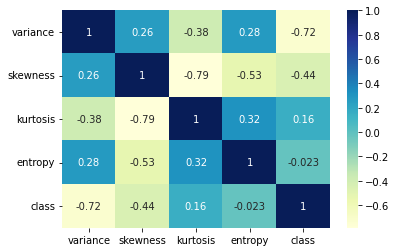

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')


In [ ]:
data.isnull()

,variance,skewness,kurtosis,entropy,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1366,False,False,False,False,False
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False


In [ ]:
#preprocessing-checking  data type of the attribute
print("info:")
print(data.info())

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1371 non-null   float64
 1   skewness  1371 non-null   float64
 2   kurtosis  1371 non-null   float64
 3   entropy   1371 non-null   float64
 4   class     1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


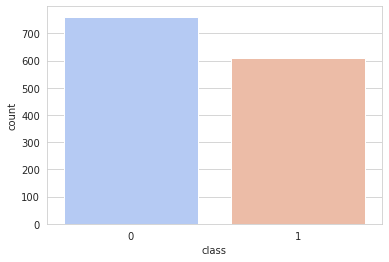

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=data,palette='coolwarm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe46a8edcd0>,
      dtype=object)

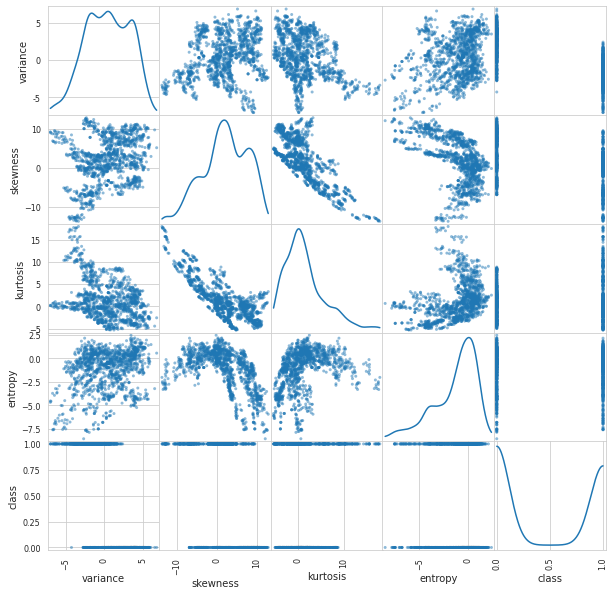

In [ ]:
#preliminarydata analysis
from pandas.plotting import scatter_matrix
scatter_matrix(data, diagonal="kde",figsize=(10, 10))

**split_the_data**

In [ ]:
X=data.drop('class',axis=1).values
y=data['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

**Normalize**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**TRAIN SVM MODEL**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)


SVC()

**TRAIN NAIVE_BAYES_ MODEL**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(X_train,y_train)



GaussianNB()

**TRAIN KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

**TEST**

In [ ]:
y_predS = clf.predict(X_test)
y_predN = nv.predict(X_test)
y_predK = knn.predict(X_test)

In [ ]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = sc.transform(new_banknote)
print(f'Prediction SVM:  Class{clf.predict(new_banknote)[0]}')
print(f'Prediction knn:  Class{knn.predict(new_banknote)[0]}')
print(f'Prediction naive_bayes:  Class{nv.predict(new_banknote)[0]}')

#print(f'Probability [0/1]:  {clf.predict_proba(new_banknote)[0]}')

Prediction SVM:  Class0
Prediction knn:  Class0
Prediction naive_bayes:  Class0


**EVALUATE TRAIN TIME AND ACCUARCY**

In [ ]:
import time
start = time.time()
accS= clf.score(X_train,y_train)
stop = time.time()
print(f"SVM Training time: {stop - start}s")
print('SVM_Train_accuracy:',accS)

start = time.time()
accN= nv.score(X_train,y_train)
stop = time.time()
print(f"NAIVE_baye Training time: {stop - start}s")
print('NAIVE_bayes_Train_accuracy:',accN)


start = time.time()
accK= knn.score(X_train,y_train)
stop = time.time()
print(f"KNNs Training time: {stop - start}s")
print('KNNs_Train_accuracy:',accK)


SVM Training time: 0.011231422424316406s
SVM_Train_accuracy: 1.0
NAIVE_baye Training time: 0.0034291744232177734s
NAIVE_bayes_Train_accuracy: 0.8357664233576643
KNNs Training time: 0.03612923622131348s
KNNs_Train_accuracy: 0.9981751824817519


**CONFUSION MATRIX**

***********naive_bayes Confusion matrix:*********


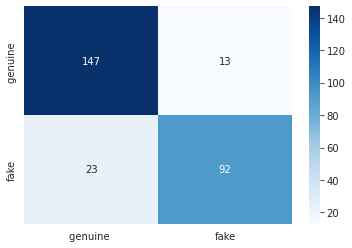

In [ ]:
cm = confusion_matrix(y_test, y_predN)
print("***********naive_bayes Confusion matrix:*********")
classes = ["genuine ", "fake"]
sns.heatmap(cm,annot=True,fmt='g',cmap = plt.cm.Blues,yticklabels=classes, xticklabels=classes)

***********KNN Confusion matrix:*********


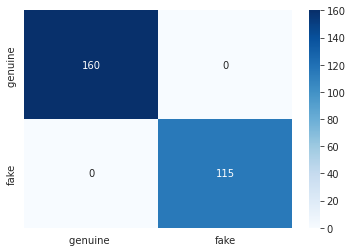

In [ ]:
cm = confusion_matrix(y_test, y_predK)
print("***********KNN Confusion matrix:*********")
classes = ["genuine ", "fake"]
sns.heatmap(cm,annot=True,fmt='g',cmap = plt.cm.Blues,yticklabels=classes, xticklabels=classes)

*************SVM Confusion matrix:*************


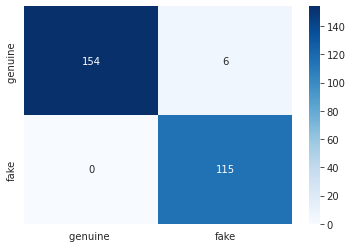

In [ ]:
cm = confusion_matrix(y_test, y_predS)
print("*************SVM Confusion matrix:*************")
classes = ["genuine ", "fake"]
sns.heatmap(cm,annot=True,fmt='g',cmap = plt.cm.Blues,yticklabels=classes, xticklabels=classes)

**CLASSIFICATION REPORT**

In [ ]:
print(" ::::::::::SVM_CLASSIFICATION_REPORT:::::::::")
print(classification_report(y_test,y_predS))

 ::::::::::SVM_CLASSIFICATION_REPORT:::::::::
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       160
           1       0.95      1.00      0.97       115

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [ ]:
print(" ::::::::::NAIVE_BAYES_CLASSIFICATION_REPORT:::::::::")
print(classification_report(y_test,y_predN))

 ::::::::::NAIVE_BAYES_CLASSIFICATION_REPORT:::::::::
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       160
           1       0.88      0.80      0.84       115

    accuracy                           0.87       275
   macro avg       0.87      0.86      0.86       275
weighted avg       0.87      0.87      0.87       275



In [ ]:
print(" ::::::::::KNN_CLASSIFICATION_REPORT:::::::::")
print(classification_report(y_test,y_predK))

 ::::::::::KNN_CLASSIFICATION_REPORT:::::::::
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       115

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



# Using Grid search to find best values of C and gamma Hyperparameters

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.995 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.991 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.995 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.941 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_          # by default we took right vale of C and Gamma

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid_predictions = grid.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


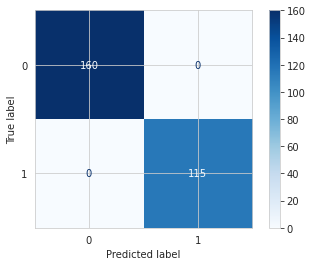

In [ ]:
confusion_matrix(y_test,grid_predictions)
disp=plot_confusion_matrix(grid, X_test, y_test,cmap=plt.cm.Blues)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       115

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

